<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB
[1 0 0 0 0]


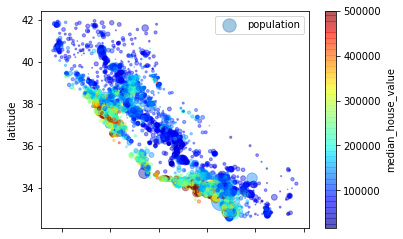

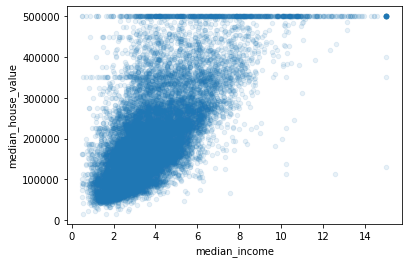

In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

housing = pd.read_csv("datasets/housing/housing.csv")
#plt.show()
#housing.describe()
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]
    
for set in (train_set, test_set):
    set.drop(["income_cat"], axis=1, inplace=True)
    
housing = train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

correlation_matrix = housing.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

housing.plot(kind="scatter", x = "median_income", y="median_house_value", alpha=0.1)

housing = train_set.drop("median_house_value", axis=1)
house_labels = train_set["median_house_value"].copy()

#housing.info()
housing_num = housing.drop("ocean_proximity", axis=1)

imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.info()
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer(sparse_output=False)
housing_cat = housing["ocean_proximity"]
housing_cat_hot = encoder.fit_transform(housing_cat)

print(housing_cat_hot[1])
